# 💳 **Aprobación Tarjetas de Crédito** 💳

Este es un modelo de Machine Learning para predecir si un aplicante a una Tarjeta de Crédito es un 'buen' o 'mal' cliente, esta definición inciialmente no está datada.



## Tareas
1. Explorar los datos
2. Preparar los datos
3. Definir el problema y crear las etiquetas del modelo.
4. Análisis Exploratorio de los datos
5. Entrenar el modelo
6. Evaluar el modelo

# **Parte 1: Cargar y explorar los datos**

In [70]:
#Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
#Cargar los datos de los archivos proporcionados
aplicantes_credito = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprovación Tarjetas de Crédito/application_record.csv')
registro_credito = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprovación Tarjetas de Crédito/credit_record.csv')

#Imprimir los datos para ver si están bien cargados
aplicantes_credito

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [72]:
registro_credito

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [73]:
print("***Información de los aplicantes***")
#Mostrar la información básica de los datos
info_aplicantes = aplicantes_credito.info()

print("***Información de los créditos***")
#Mostrar la información de los aplicantes al crédito
info_creditos = registro_credito.info()


***Información de los aplicantes***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-

***Data Set Aplicantes***

**Cantidad de Registros**: 438556
**Columnas**: 18



***DataSet de los Créditos***

**Cantidad de Registros:** 1048575
**Columnas:** 3


Con base a lo anterior:

**DataSet Aplicantes**: Tiene 17 columnas, con diversos tips de datos, más que todo objetos y enteros de 64 bits.

Las columnas traen los siguientes datos.

- Genero
- Si tienen carro
- Si tienen propiedades
- Cuántos hijos tienen
- Ingresos Anuales
- Tipos de ingresos
- Nivel Educativo
- Si estan casados
- Si viven en casa propia o arriendo (forma de vivienda)
- Cuántos días han estado empleados
- Si tienen celular, telefono corporativo, si tienen email.
- Cuál es su ocupación
- Cuántos miembros hay en su familia

**Data Set de los Créditos**: Tiene 3 columnas, el id del crédito, los meses que se ha hecho el balance del crédito, y el estaodo del crédito.

**C**: Pagada la cuota de ese mes.

**X:** No posee préstamos para ese mes.




# **Parte 2: Explorar  los datos**

In [74]:
#Explorar valores únicos en la columna STATUS de credit_record
unico_status = registro_credito['STATUS'].value_counts()

#Verificar la cantidad de IDs únicos en cada dataset
id_unico_creditos = registro_credito['ID'].nunique()

#Comprobar la intersección de IDs entre los ids (que generan cosas incompatibles)
id_comun = len(set(aplicantes_credito['ID']).intersection(set(registro_credito['ID'])))

#Mostrar las variables
print(unico_status)
print(id_unico_creditos)
print(id_comun)

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64
45985
36457


C -> Cantidad de pagos al mes

0 -> Estado del crédito (en este caso es 1 a 29 días)

X -> Si no posee créditos ese mes.

Los números (1,2,3,4) Son la cantidad de personas con retraso en los pagos.

El id común registra que solo 36457 aplicantes tienen un historial crediticio


In [75]:
#Unir las tablas usando los ID's comunes
datos_con_id_comun = aplicantes_credito[aplicantes_credito['ID'].isin(registro_credito['ID'])]

In [76]:
datos_con_id_comun

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0
434809,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0
434810,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0
434811,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0


## **Parte 3: Etiquetar los datos**


Se buscan si los registros en deuda son altos, y si su estado es mayor o igual a 2 porque significa que tiene más de una deuda

In [77]:
#Crear etiquetas basadas en la columna Status del DataSet
#Es un mal cantidato si STATUS >= 2

#Condicional en funcion lambda
registro_credito['LABEL'] = registro_credito['STATUS'].apply(lambda x: 'bad' if x in ['2', '3', '4', '5'] else 'good')

#Obtener y asignar la etiqueta fianl dependiendo del id
labels = registro_credito.groupby('ID')['LABEL'].apply(lambda x: 'bad' if 'bad' in x.values else 'good').reset_index()

#Unir etiquetas con los datos ya filtrados
datos_etiquetados = datos_con_id_comun.merge(labels, on='ID', how='inner') #merge combina DataFrames de Pandas, y especifica que la unión se debe realizar usando la columna ID
#how inner -> define el tipo de la union (merge), innerjoin -> incluye solo los registros que estan presentes en ambos dataframes

#Ver resumen del dataset
resumen = datos_etiquetados['LABEL'].value_counts()

#Ver los datos finales
datos_etiquetados.head()




,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,LABEL
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,good
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,good
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,good
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,good
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,good


In [78]:
resumen

,count
LABEL,
good,35841
bad,616


# **Parte 3: Análisis Exploratorio**



*   **Distribución de las variables**: Análizar las variables continúas y categoricas.
*   **Correlaciones:** Ver si hay alguna relación entre las variables, especialmente entre las condiciones socioeconómicas y la etiquetas.
* **Visualizaciones:** Gráficar los datos para obtener una mejor intuición sobre su distribución.




<Axes: xlabel='LABEL', ylabel='count'>

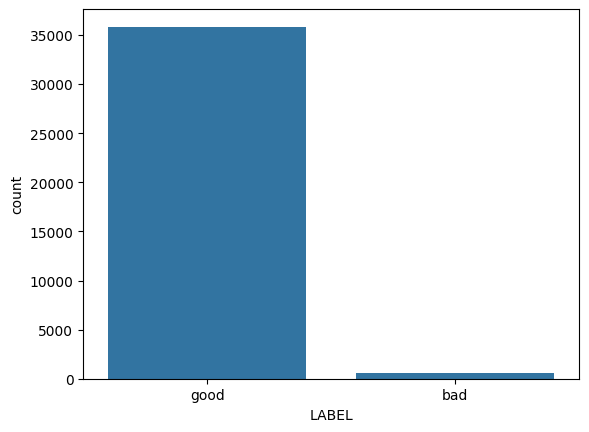

In [79]:
#Verificiar la distrinbución de clases, y ver la distribución de las variables con Seaborn

sns.countplot(x = 'LABEL', data=datos_etiquetados)

Podemos ver que hay más "Cantidatos buenos" que malos, por esto más adelante, al entrenar el modelo debemos manejar el sobreajuste

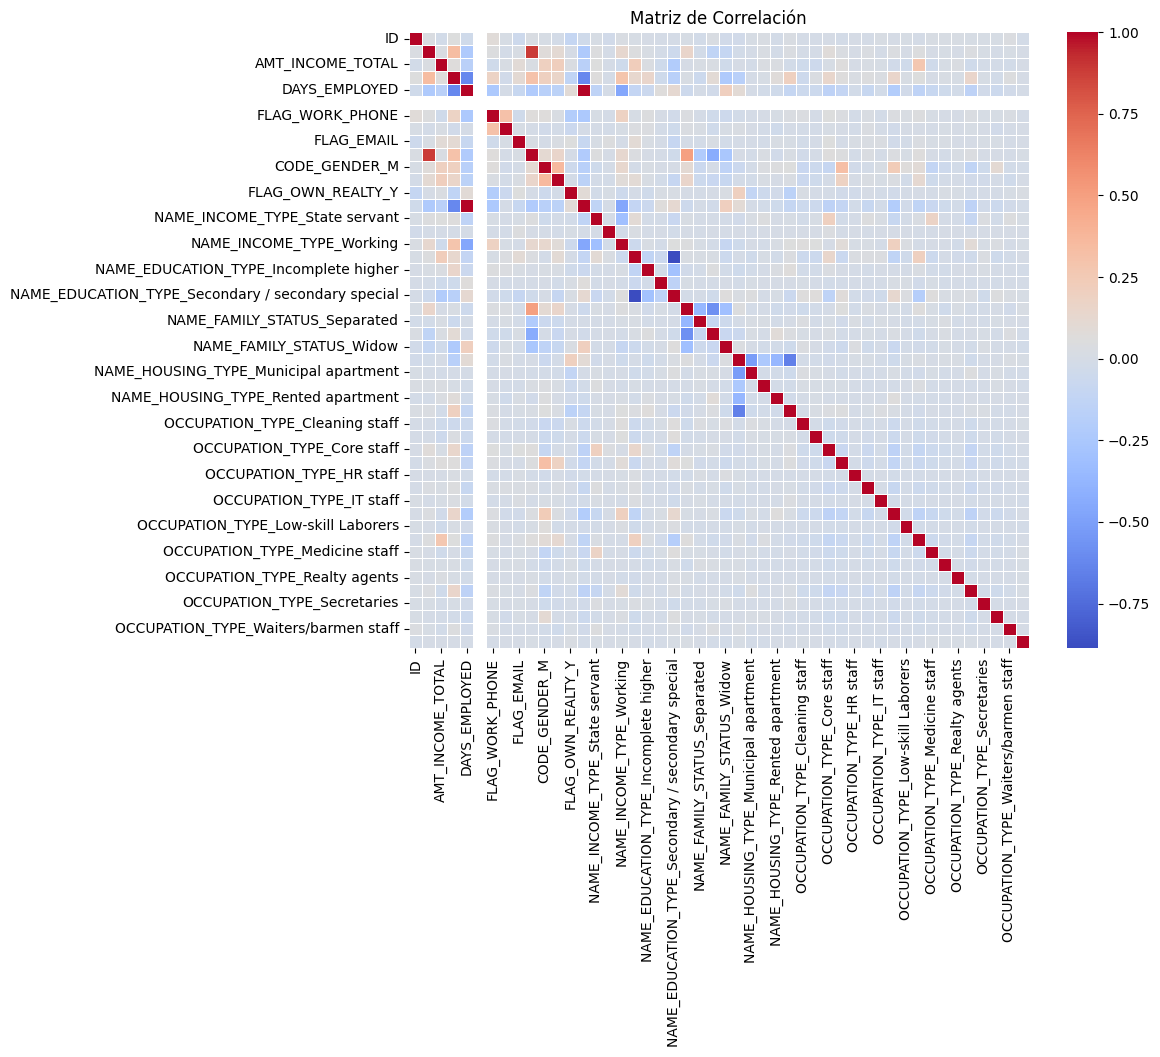

In [80]:
#Realizar el análisis de correlación entre variables

#Aplicar One-Hot-Encoding
datos_numericos = pd.get_dummies(datos_etiquetados, drop_first=True)

#Crear la matriz de correlación entre variables numéricas
matriz_correlacion = datos_numericos.corr()

#Visualizar la matriz de correlación, por medio de un mapa de calor

#Crear el canvas
plt.figure(figsize=(10, 8))

#Hacer el mapa de calor con seaborn
sns.heatmap(matriz_correlacion, annot=False, cmap = 'coolwarm', fmt = '.2f', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()



Se ve que hay altas correlaciones entre filas y columnas únicas, y unas muy leves entre otras variables que influyen de forma menor en el ejercicio, el modelo tienen desbalabnceo muy importante de datos que se debe arreglar antes de entrenar el modelo.

## Arreglar el desbalanceo de los datos

Vamos a usar la técnica de submuestreo de la clase minoritaria. Va a generar muestras que no existen en los datos actuales de las clases con mesnos datos, para balancear los datos (es como inventarse datos para poder trabajar de forma equilibrada)

- Por sus siglas en inglés esta técnica se conoce como SMOTE

In [81]:
#Instalamos la libreria, imbalanced learn
!pip install imbalanced-learn

In [82]:
#Aplicar el submuestro al a la clase minoritaria
from imblearn.over_sampling import SMOTE #Librería para aplicar SMOTE
from collections import Counter #Es una subclase de los diccionarios para contar elementos como una secuencia

# **Implementar el modelo Vintage**
Se usa cuando no se tiene una definición explicita de los clientes y no existe un criterio establecido para el modelo.

También se conoce como el análisis de cocechas en riesgo crediticio, se usa para estimar los préstamos en cartera. Se hace el seguimiento de su cartera a lo largo de su vida crediticia y medir la calidad de la cartera.

[Mas información](https://amsoft.medium.com/an%C3%A1lisis-de-cosechas-con-python-c%C3%B3mo-evaluar-el-riesgo-crediticio-por-periodo-de-maduraci%C3%B3n-71e06aa920bf)

Paso 1: Dividir los datos de entrenamiento y de prueba

In [88]:
from sklearn.impute import SimpleImputer

# Paso 1: Imputar características (X_encoded_imputed)
if X_encoded_imputed.isna().sum().sum() > 0:
    # Usamos la media para las características numéricas
    imputer_X = SimpleImputer(strategy='mean')
    X_encoded_imputed = imputer_X.fit_transform(X_encoded_imputed)

# Paso 2: Imputar etiquetas (y)
if y.isna().sum() > 0:
    # Usamos el valor más frecuente para las etiquetas
    imputer_y = SimpleImputer(strategy='most_frequent')  # Imputación con el valor más frecuente
    y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1))
    y = y_imputed.flatten()  # Convertir de nuevo a un array 1D

# Verificar cuántas filas tenemos después de la imputación
print(f"Cantidad de registros después de imputar características y etiquetas: {X_encoded_imputed.shape[0]}")


Cantidad de registros después de imputar características y etiquetas: 36457


In [89]:
# Ahora podemos dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded_imputed, y, test_size=0.2, random_state=42)

# Ahora entrenar el modelo
modelo.fit(X_train, y_train)

# Imprimir el modelo entrenado
print(f"Modelo entrenado con {len(y_train)} muestras.")


Modelo entrenado con 29165 muestras.


Paso 2: Medir el rendimiento del entrenamiento

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

# Predecir las etiquetas para el conjunto de prueba
y_pred = modelo.predict(X_test)

# Mostrar el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7175
           1       0.39      0.17      0.24       117

    accuracy                           0.98      7292
   macro avg       0.69      0.58      0.61      7292
weighted avg       0.98      0.98      0.98      7292

Matriz de confusión:
[[7144   31]
 [  97   20]]


# Resultados de la predicción

<Axes: >

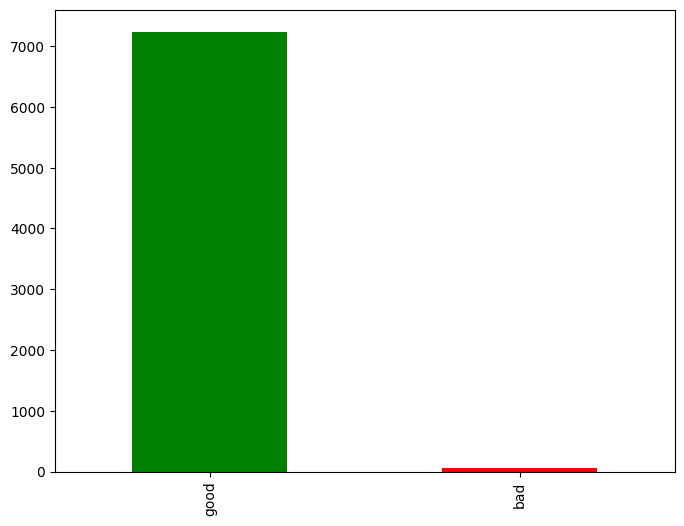

In [92]:
#Realizar las predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

#Convertir las predicciones de números (0 y 1) a etiquetas 'good' y 'bad'
#Convertir a una serie de Pandas para poder hacer el map
y_pred_labels =pd.Series(y_pred).map({0: 'good', 1: 'bad'})

#Graficar la cantidad de personas que son aprobadas (good)
plt.figure(figsize=(8,6))
#Será un gráfico de barras
y_pred_labels.value_counts().plot(kind='bar', color=['green', 'red'])




# Resultados

- Parece que el modelo esta siedo víctima de overfitting, quiere decir que tiene una tendencia a la tendencia positiva, porque sigue pareciendo, que como al principio hay una cantidad muy grande de gente a la que el crédito le será aprobado, sin embargo acá se encuentran muchos más datos.

Si no existe el overfitting significa que la tendencia inicial donde se van a aprobar más tarjetas de crédito se mantiene constante y se aumenta aún mas en tamaño,quiere decir que la reputación crediticia de la población es suficientemente buena para aprobar las tarjetas.